In [96]:
import numpy as np
from quantecon.markov.approximation import rouwenhorst, tauchen
import matplotlib.pyplot as plt
from tabulate import tabulate
from pathlib import Path
PATH = Path('//bbking2.mit.edu/mbarrera/git_supply/14_462/recitation_2')

# Rouwenwost vs Tauchen

In [97]:
def simulate_discrete_state(rho:float, sigma:float, method, n: int, T:int=1000)->np.ndarray:
    if method == 'rouwenhorst':
        markov = rouwenhorst(n = n,rho = rho, sigma = sigma)
    elif method == 'tauchen':
        markov = tauchen(n=n, rho = rho, sigma = sigma)
    states = markov.state_values
    probability = markov.P
    y = np.zeros(T)
    y[0] = np.random.choice(states, 1, p=markov.stationary_distributions.flatten())
    for t in range(T-1):
        y[t+1] = np.random.choice(states, 1, p=probability[states==y[t]].flatten())
    return y

def simulate_continuous_state(rho:float, sigma:float, T=1000)->np.ndarray:
    y = np.zeros(T)
    y[0] = np.random.normal(0,np.sqrt(sigma**2/(1-rho**2)))
    for t in range(T-1):
        y[t+1] = rho*y[t]+np.random.normal(0,sigma)
    return y

C:\Users\MBBar\AppData\Local\Temp\ipykernel_15712\1711351216.py:3: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  markov = rouwenhorst(n = n,rho = rho, sigma = sigma)
C:\Users\MBBar\AppData\Local\Temp\ipykernel_15712\1711351216.py:5: UserWarning: The API of tauchen has changed from `tauchen(rho, sigma_u, b=0., m=3, n=7)` to `tauchen(n, rho, sigma, mu=0., n_std=3)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  markov = tauchen(n=n, rho = rho, sigma = sigma)
C:\Users\MBBar\AppData\Local\Temp\ipykernel_15712\3682380920.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


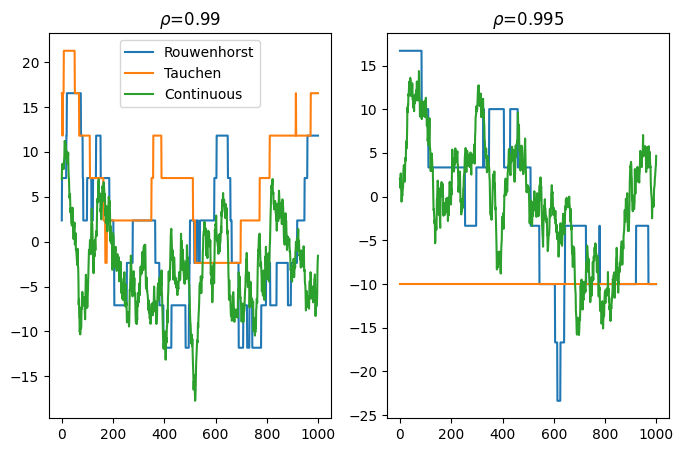

In [98]:
rho = [0.99, 0.995]
sigma=1
fig,ax= plt.subplots(ncols=2, figsize=(8,5))
for i in [0,1]:
    ax[i].plot(simulate_discrete_state(rho[i], sigma, 'rouwenhorst', n=10), label='Rouwenhorst')
    ax[i].plot(simulate_discrete_state(rho[i], sigma, 'tauchen', n=10), label='Tauchen')
    ax[i].plot(simulate_continuous_state(rho[i], sigma), label='Continuous')
    ax[i].set(title=fr'$\rho$={rho[i]}')
    if i==0:
        ax[i].legend()
fig.show()
fig.savefig(PATH / 'figures/discrete_ar1_approximation.pdf')

In [100]:
rho = 0.9
sigma = 1 
T=1000
n=50
print(tabulate([['Theoretical',round(sigma**2/(1-rho**2),3)],
                ['Rouwenhorst',round(np.var(simulate_discrete_state(rho, sigma, "rouwenhorst", n=n,T=T)),3)],
                ['Tauchen',round(np.var(simulate_discrete_state(rho, sigma, "tauchen", n=n,T=T)),3)]], headers=['Method','Variance']))

Method         Variance
-----------  ----------
Theoretical       5.263
Rouwenhorst       5.042
Tauchen           4.393


C:\Users\MBBar\AppData\Local\Temp\ipykernel_15712\1711351216.py:3: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  markov = rouwenhorst(n = n,rho = rho, sigma = sigma)
C:\Users\MBBar\AppData\Local\Temp\ipykernel_15712\1711351216.py:5: UserWarning: The API of tauchen has changed from `tauchen(rho, sigma_u, b=0., m=3, n=7)` to `tauchen(n, rho, sigma, mu=0., n_std=3)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  markov = tauchen(n=n, rho = rho, sigma = sigma)


In [102]:
from golden_vec import root_scalar_vec

root_scalar_vec(lambda x: x-np.array([1,2]), bracket=[-1,4] )

      converged: True
           flag: 'converged'
 function_calls: 49
     iterations: 49
           root: array([1., 2.])